# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Create path variable
path = r'C:\Users\justi\Downloads\05-2024 Instacart Basket Analysis_JB\05-2024 Instacart Basket Analysis'

# Import 'ords_prods_custs' dataframe completed from Exercise 4.9.1
instacart = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))

# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

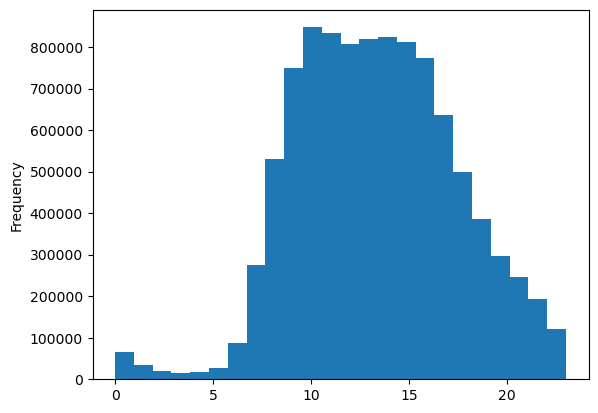

In [5]:
# Create histogram from matplotlib library
hist = instacart['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram demonstrates that users tend to order groceries the most between hours 10-15. The shape of distribution is indicating users order more frequently in the middle of the day rather than beginning or end.

# 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

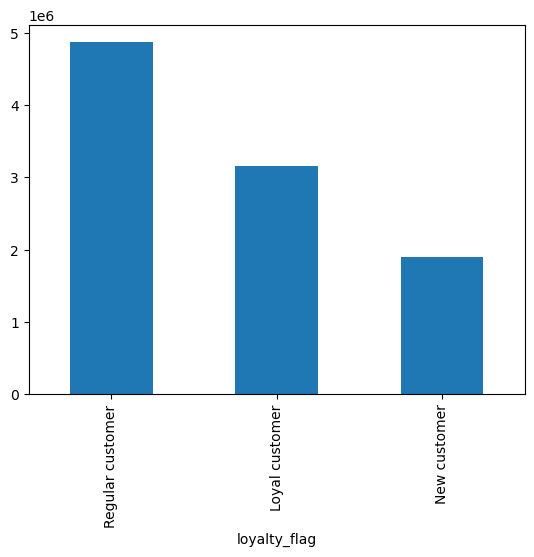

In [8]:
# Create bar chart from matplotlib library
bar = instacart['loyalty_flag'].value_counts().plot.bar()

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [9]:
# Create a random sample by generating a seed using np.random.seed() function from numpy library
np.random.seed(4)

In [10]:
# Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
# Create a dev list to split dataframe into two samples with the same distribution (Ex: 70/30 split)
# In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows.
# Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. 
dev = np.random.rand(len(instacart)) <= 0.7

In [11]:
# Split the dataframe into two samples where big= 70%, small= 30%
big = instacart[dev]
small = instacart[~dev]

In [12]:
# Compare 'instacart' dataframe length to sum of 'big' and 'small' samples
len(instacart)

9918253

In [13]:
# 'big' and 'small' line items adds up to sum of 'instacart' dataframe's total line items
len(big) + len(small)

9918253

In [14]:
# Make a new subset of 30% data ('small') and call it 'instacart_2'. Only show 'prices' and 'order_hour_of_day' columns
instacart_2 = small [['order_hour_of_day','prices']]

In [15]:
# Validate subset of small sample shows only those 2 columns
instacart_2.head(5)

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


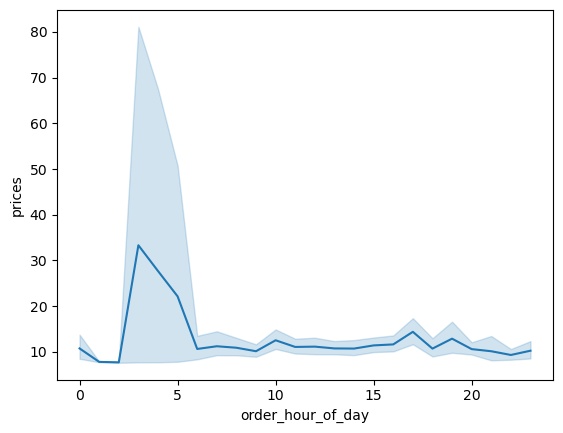

In [16]:
# Create a line chart from seaborn library
line = sns.lineplot(data = instacart_2, x = 'order_hour_of_day', y = 'prices')

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [17]:
# Make a new subset of 30% data ('small') and call it 'instacart_3'. Only show 'age' and 'n_dependents' columns
instacart_3 = small [['age','n_dependants']]

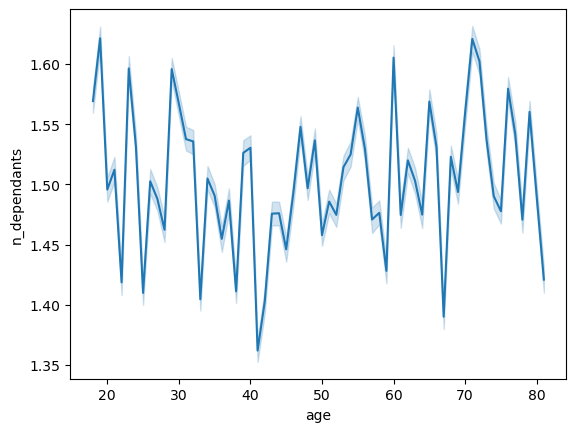

In [18]:
# Create a line chart using seaborn library
line_2 = sns.lineplot(data = instacart_3, x = 'age', y = 'n_dependants')

#### There is not a strong connection between age and family situation (# of dependents). The line does not go predominantly up or down as age increases.

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [19]:
# Make a new subset of 30% data ('small') and call it 'instacart_4'. Only show 'age' and 'income' columns
instacart_4 = small [['age','income']]

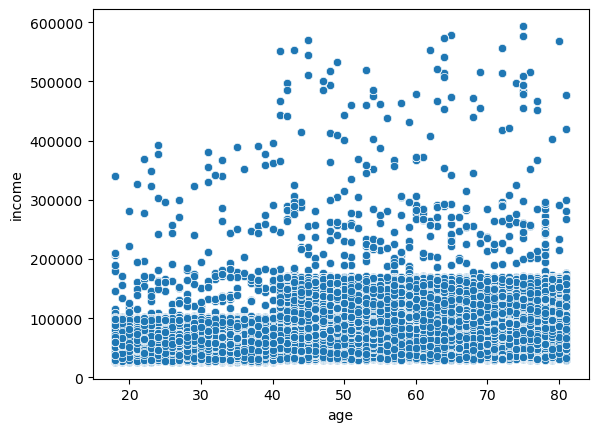

In [20]:
# Create a scatterplot using seaborn library
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = instacart_4)

#### For ages 40 and below, income looks below 400,000, with the strongest concentration of those make under 100,000. For ages 40+, there's an upward trend in income, with heavy concentration of 0-200k. There are outliers of users earning 600,000 and so this vaguely suggest income increases with age. Further statistical analysis is needed to confirm or disconfirm if there are any correlations regarding the relationship between age and income among Instacart users.

# 8. Export your visualizations as “.png” files in your relevant project folder.

In [23]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_order_hour_of_day.png'))

In [24]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_loyalty_flag_distribution.png'))

In [25]:
# Export line chart 1
line.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_price_over_hour_of_day.png'))

In [26]:
# Export line chart 2
line_2.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_age_vs_dependants.png'))

In [27]:
# Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'scatterplot_age_vs_income.png'))